# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [3]:
# Notebooks specific imports
from IPython import get_ipython
ipython = get_ipython()
#Expand notebook display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic useful imports
import re
import time
import yaml
from pprint import pprint
from pathlib import Path
import h5py

# Data manipulation
import numpy as np
from scipy.special import erf
from scipy.integrate import quad

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import (Circle, RegularPolygon, FancyArrowPatch, ArrowStyle)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
import matplotlib.colors as colors

# From AMSOS_analysis.py
import amsos_analysis as aa
from amsos_analysis.colormaps import register_cmaps

# Locations
ws_path = Path('/home/alamson/DATA/Chromatin/')
mnt_path = Path.home() / 'projects/DATA/Chromatin/'
ceph_path = Path.home() / 'ceph/DATA/Chromatin/'

### Style settings

In [4]:
graph_sty = {
    "axes.titlesize": 20,
    "axes.labelsize": 24,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "xtick.labelsize": 24,
    "ytick.labelsize": 24,
    "font.size": 20,
    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(graph_sty)

register_cmaps()
#plt.rcParams['image.cmap'] = 'emct8'
#plt.rcParams['image.cmap'] = 'warm'
plt.rcParams['image.cmap'] = 'YlOrRd'
#plt.rcParams['image.cmap'] = 'twilight'
#plt.rcParams['image.cmap'] = 'coolwarm'
#plt.rcParams['image.cmap'] = 'RdYlBu_r'
        

# Functions

# Individual seed scan graphs

/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_seed_scan_analysis.py:95: RuntimeWarning: divide by zero encountered in log
  log_avg_contact_mat = np.log(avg_contact_mat) - np.log(num_seeds)


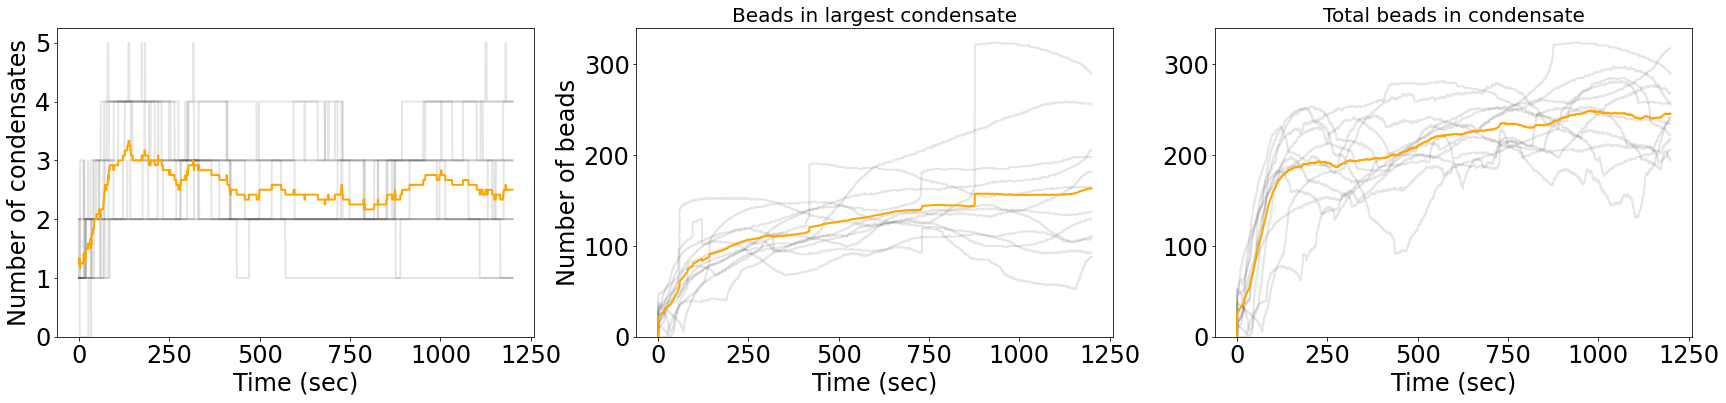

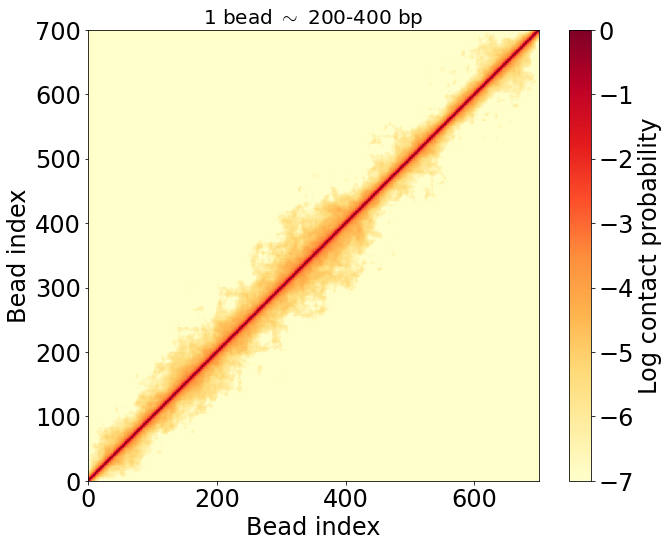

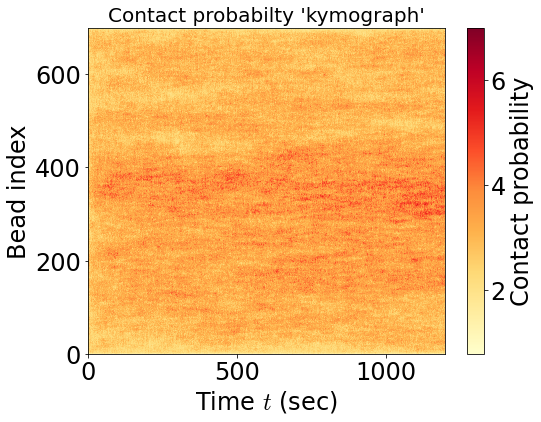

In [206]:
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/kod0.1"

try:
    sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('s*/analysis/*.h5')]
    ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
    end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
    time_arr = sd_h5_data_lst[0]['time'][ss_ind:end_ind]
    start_bead = 0
    end_bead = None
    nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]

    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
    
    aa.plot_condensate_num_sd_scan(axarr1[0], time_arr, cond_num_arr)
    aa.plot_condensate_size_sd_scan(axarr1[1:], time_arr, max_width_arr, total_bead_arr)
    fig1.tight_layout()
    
    log_avg_contact_mat = aa.get_scan_avg_contact_mat(sd_h5_data_lst)
    fig2, ax2 = aa.make_hic_plot(nbeads, log_avg_contact_mat, vmin=-7.)
    
    fig3, ax3 = plt.subplots(figsize=(8, 6))
    avg_contact_kymo = aa.get_scan_avg_kymo(sd_h5_data_lst)
    aa.plot_contact_kymo(fig3, ax3, time_arr, avg_contact_kymo, vmax=7.)
    #fig, ax = aa.make_hic_plot(com_arr, log_avg_contact_mat/num_seeds, vmin=-7.)
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_seed_scan_analysis.py:95: RuntimeWarning: divide by zero encountered in log
  log_avg_contact_mat = np.log(avg_contact_mat) - np.log(num_seeds)


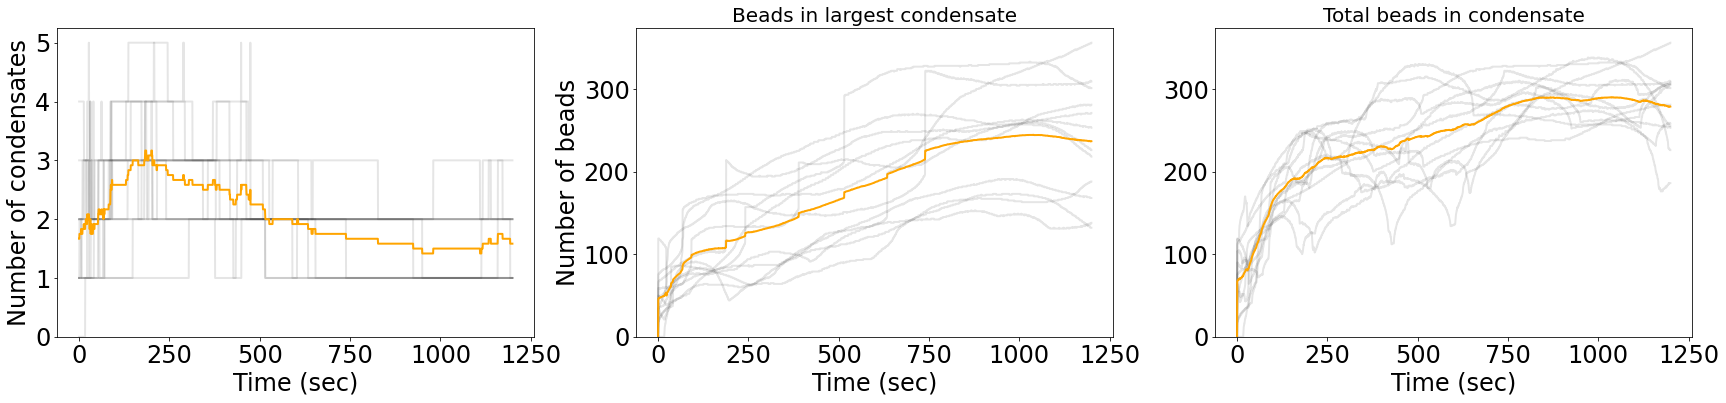

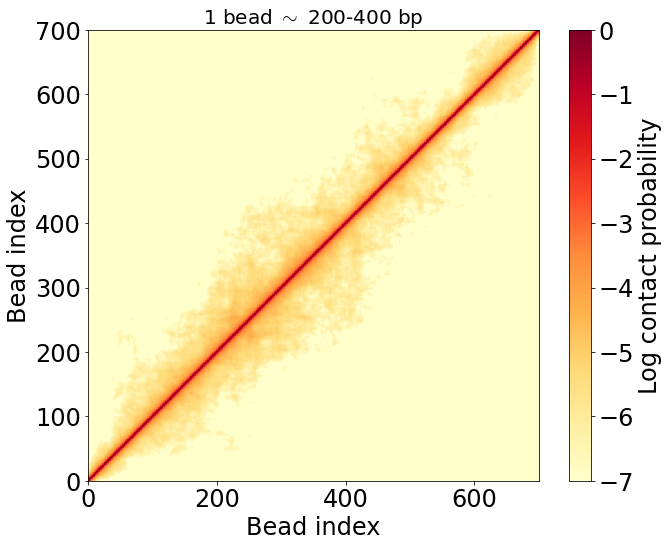

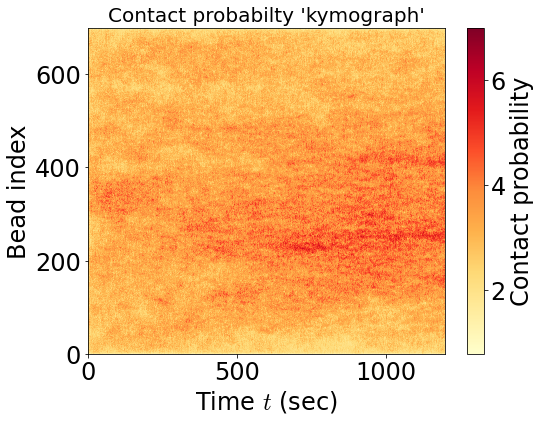

In [209]:
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/kod0.3"

try:
    sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('s*/analysis/*.h5')]
    ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
    end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
    time_arr = sd_h5_data_lst[0]['time'][ss_ind:end_ind]
    start_bead = 0
    end_bead = None
    nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]

    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
    
    aa.plot_condensate_num_sd_scan(axarr1[0], time_arr, cond_num_arr)
    aa.plot_condensate_size_sd_scan(axarr1[1:], time_arr, max_width_arr, total_bead_arr)
    fig1.tight_layout()
    
    log_avg_contact_mat = aa.get_scan_avg_contact_mat(sd_h5_data_lst)
    fig2, ax2 = aa.make_hic_plot(nbeads, log_avg_contact_mat, vmin=-7.)
    
    fig3, ax3 = plt.subplots(figsize=(8, 6))
    avg_contact_kymo = aa.get_scan_avg_kymo(sd_h5_data_lst)
    aa.plot_contact_kymo(fig3, ax3, time_arr, avg_contact_kymo, vmax=7.)
    #fig, ax = aa.make_hic_plot(com_arr, log_avg_contact_mat/num_seeds, vmin=-7.)
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_seed_scan_analysis.py:95: RuntimeWarning: divide by zero encountered in log
  log_avg_contact_mat = np.log(avg_contact_mat) - np.log(num_seeds)


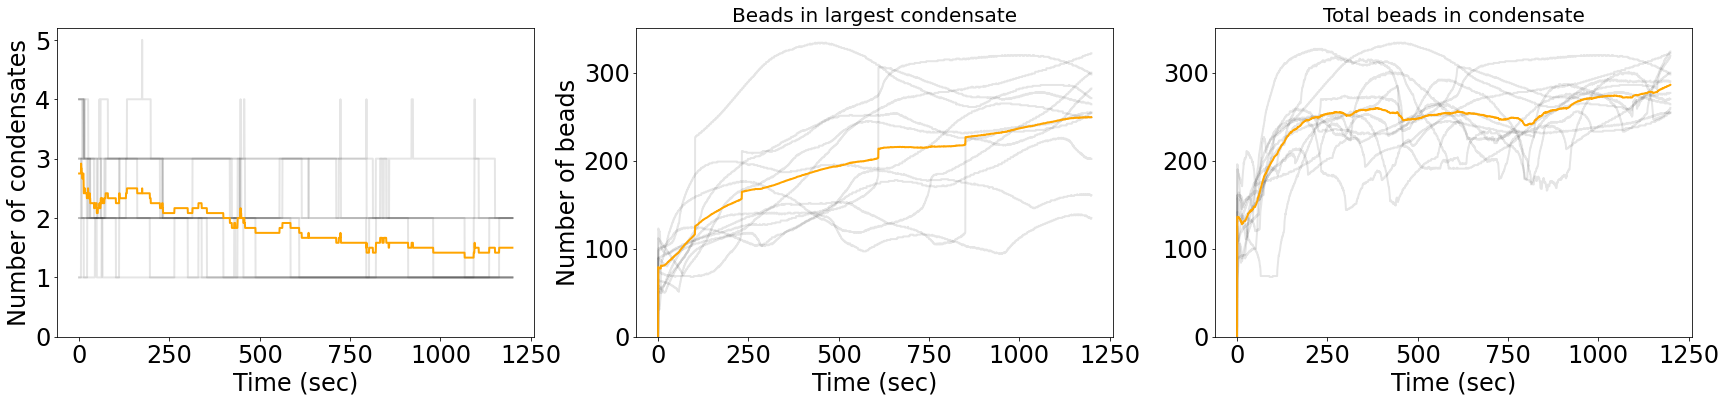

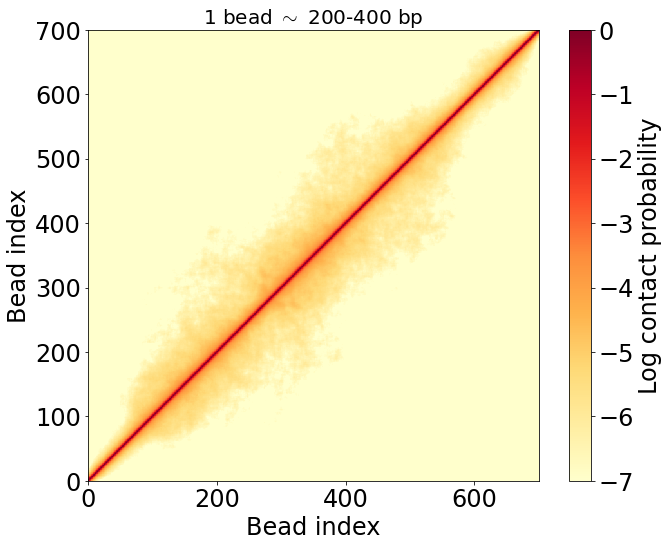

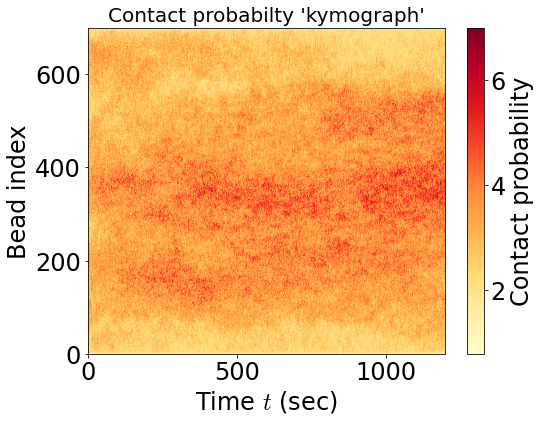

In [210]:
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/kod1"

try:
    sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('s*/analysis/*.h5')]
    ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
    end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
    time_arr = sd_h5_data_lst[0]['time'][ss_ind:end_ind]
    start_bead = 0
    end_bead = None
    nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]

    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
    
    aa.plot_condensate_num_sd_scan(axarr1[0], time_arr, cond_num_arr)
    aa.plot_condensate_size_sd_scan(axarr1[1:], time_arr, max_width_arr, total_bead_arr)
    fig1.tight_layout()
    
    log_avg_contact_mat = aa.get_scan_avg_contact_mat(sd_h5_data_lst)
    fig2, ax2 = aa.make_hic_plot(nbeads, log_avg_contact_mat, vmin=-7.)
    
    fig3, ax3 = plt.subplots(figsize=(8, 6))
    avg_contact_kymo = aa.get_scan_avg_kymo(sd_h5_data_lst)
    aa.plot_contact_kymo(fig3, ax3, time_arr, avg_contact_kymo, vmax=7.)
    #fig, ax = aa.make_hic_plot(com_arr, log_avg_contact_mat/num_seeds, vmin=-7.)
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_seed_scan_analysis.py:95: RuntimeWarning: divide by zero encountered in log
  log_avg_contact_mat = np.log(avg_contact_mat) - np.log(num_seeds)


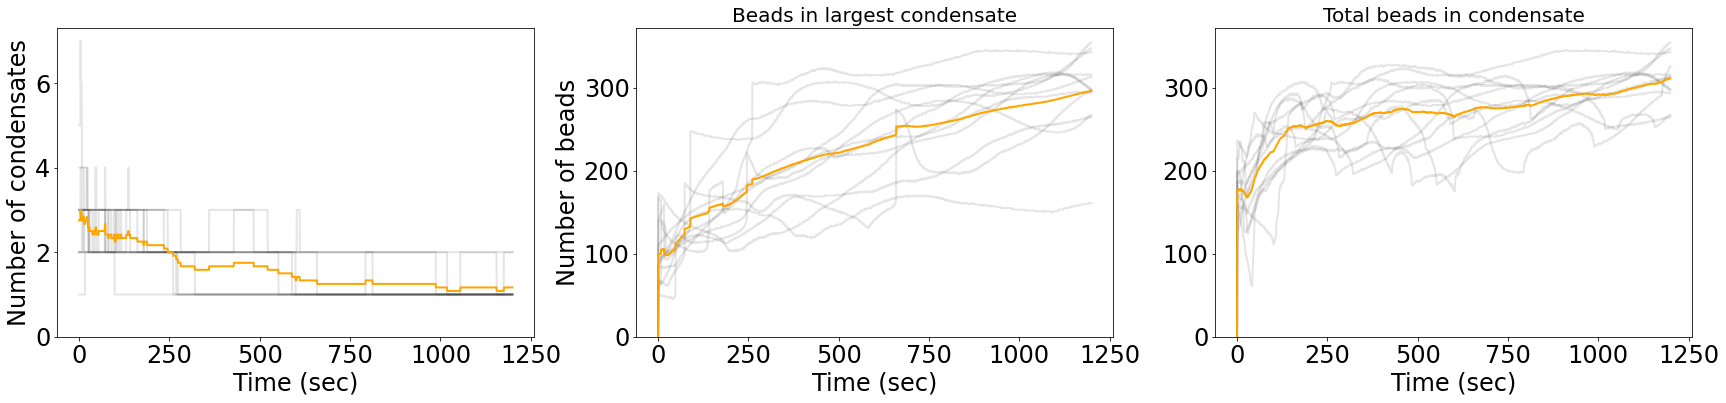

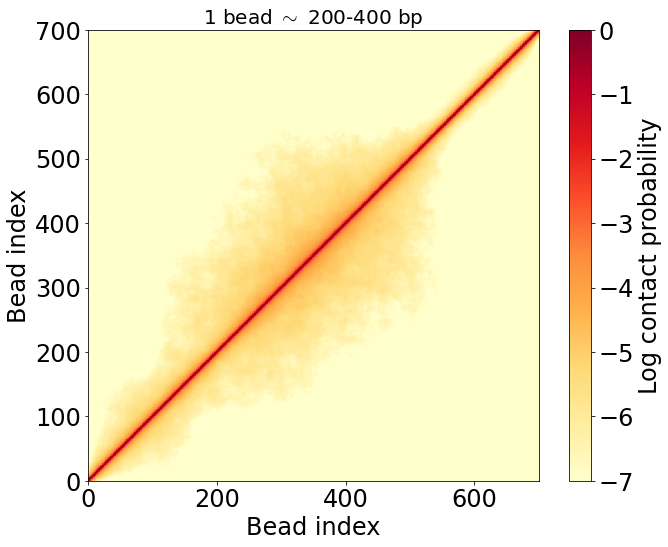

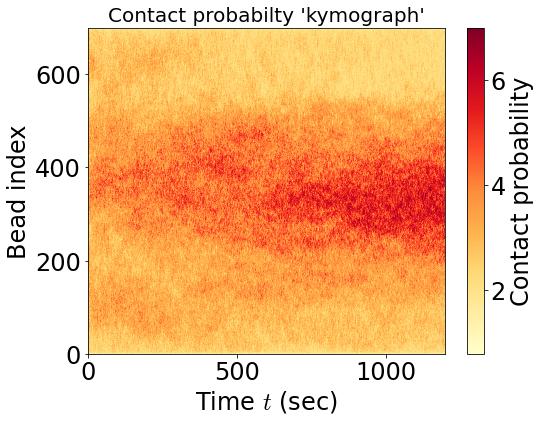

In [211]:
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/kod3"

try:
    sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('s*/analysis/*.h5')]
    ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
    end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
    time_arr = sd_h5_data_lst[0]['time'][ss_ind:end_ind]
    start_bead = 0
    end_bead = None
    nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]

    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
    
    aa.plot_condensate_num_sd_scan(axarr1[0], time_arr, cond_num_arr)
    aa.plot_condensate_size_sd_scan(axarr1[1:], time_arr, max_width_arr, total_bead_arr)
    fig1.tight_layout()
    
    log_avg_contact_mat = aa.get_scan_avg_contact_mat(sd_h5_data_lst)
    fig2, ax2 = aa.make_hic_plot(nbeads, log_avg_contact_mat, vmin=-7.)
    
    fig3, ax3 = plt.subplots(figsize=(8, 6))
    avg_contact_kymo = aa.get_scan_avg_kymo(sd_h5_data_lst)
    aa.plot_contact_kymo(fig3, ax3, time_arr, avg_contact_kymo, vmax=7.)
    #fig, ax = aa.make_hic_plot(com_arr, log_avg_contact_mat/num_seeds, vmin=-7.)
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_seed_scan_analysis.py:95: RuntimeWarning: divide by zero encountered in log
  log_avg_contact_mat = np.log(avg_contact_mat) - np.log(num_seeds)


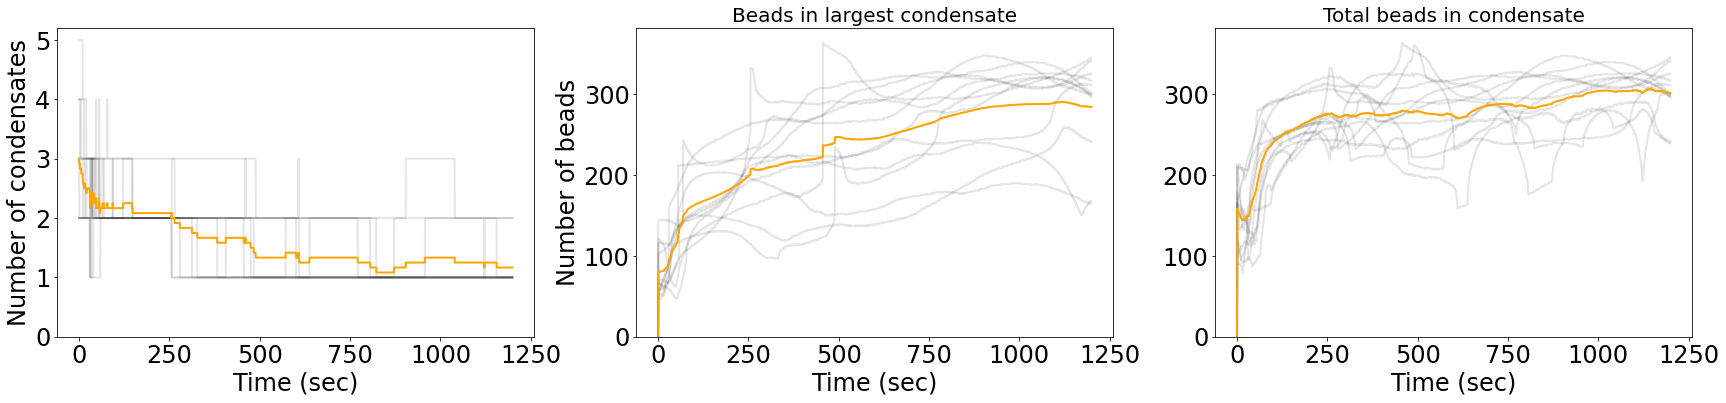

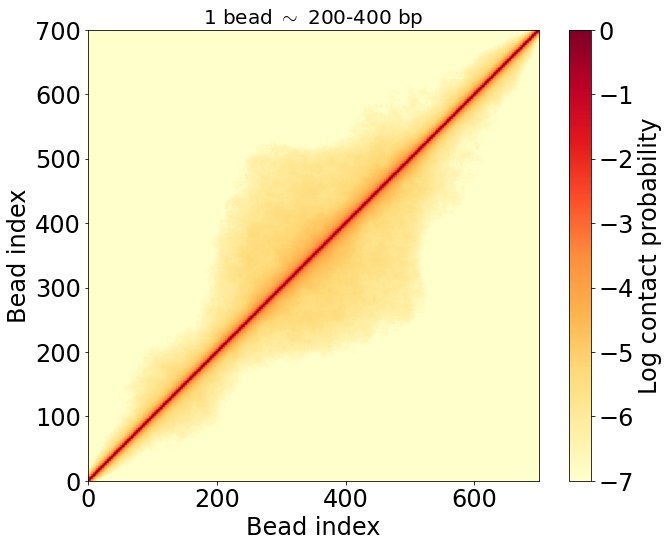

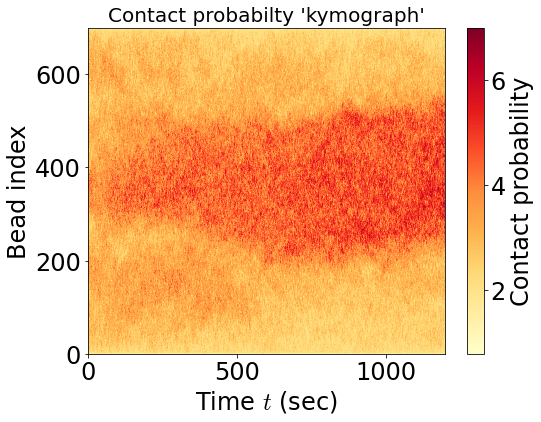

In [212]:
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/kod10"

try:
    sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('s*/analysis/*.h5')]
    ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
    end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
    time_arr = sd_h5_data_lst[0]['time'][ss_ind:end_ind]
    start_bead = 0
    end_bead = None
    nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]

    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
    
    aa.plot_condensate_num_sd_scan(axarr1[0], time_arr, cond_num_arr)
    aa.plot_condensate_size_sd_scan(axarr1[1:], time_arr, max_width_arr, total_bead_arr)
    fig1.tight_layout()
    
    log_avg_contact_mat = aa.get_scan_avg_contact_mat(sd_h5_data_lst)
    fig2, ax2 = aa.make_hic_plot(nbeads, log_avg_contact_mat, vmin=-7.)
    
    fig3, ax3 = plt.subplots(figsize=(8, 6))
    avg_contact_kymo = aa.get_scan_avg_kymo(sd_h5_data_lst)
    aa.plot_contact_kymo(fig3, ax3, time_arr, avg_contact_kymo, vmax=7.)
    #fig, ax = aa.make_hic_plot(com_arr, log_avg_contact_mat/num_seeds, vmin=-7.)
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_seed_scan_analysis.py:95: RuntimeWarning: divide by zero encountered in log
  log_avg_contact_mat = np.log(avg_contact_mat) - np.log(num_seeds)


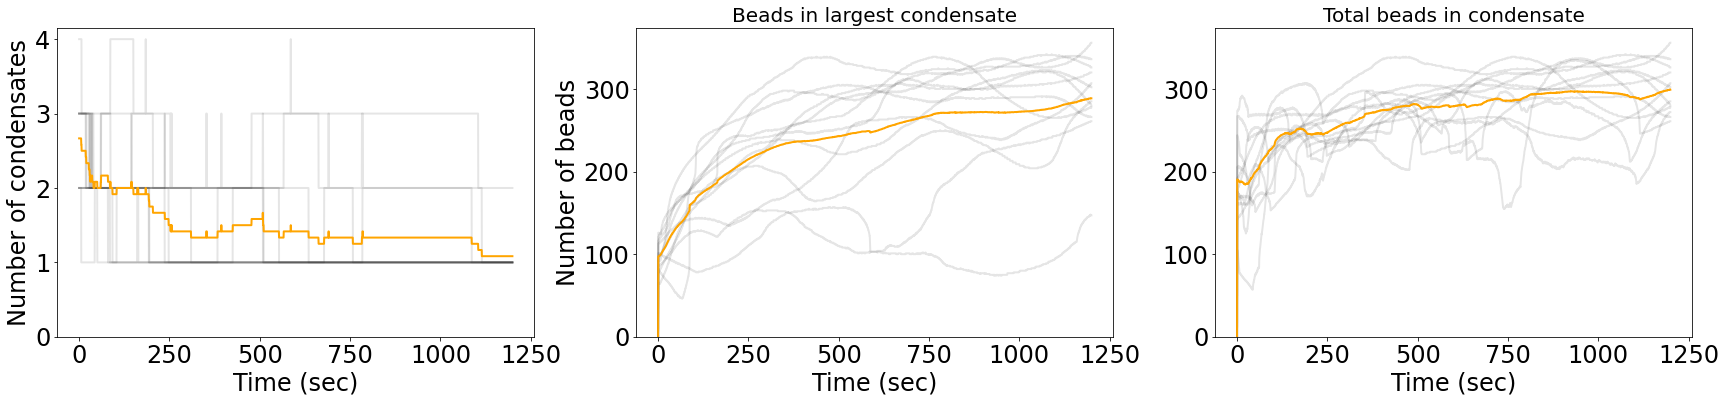

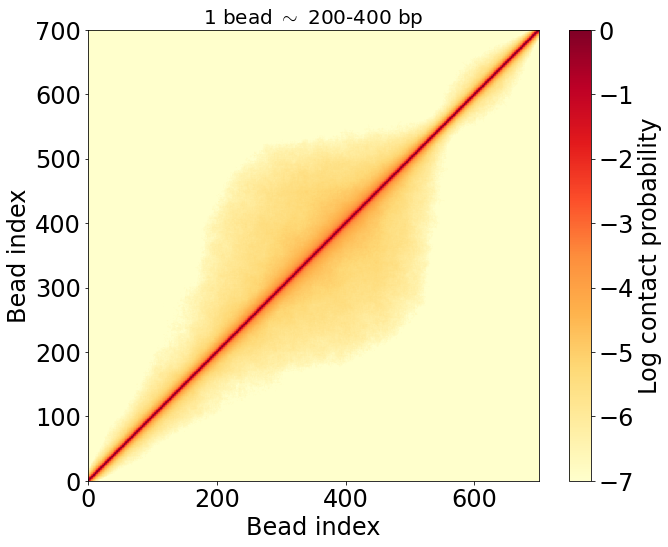

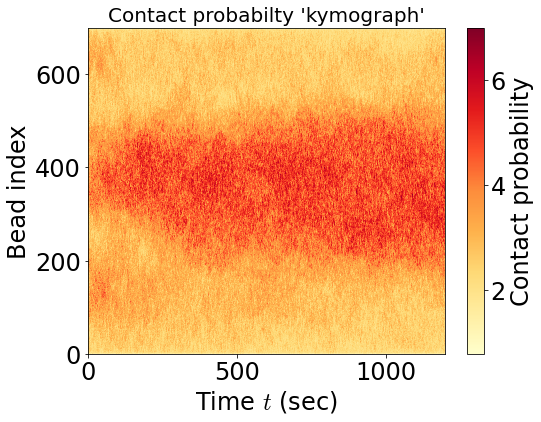

In [208]:
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/kod100"

try:
    sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('s*/analysis/*.h5')]
    ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
    end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
    time_arr = sd_h5_data_lst[0]['time'][ss_ind:end_ind]
    start_bead = 0
    end_bead = None
    nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]

    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
    
    aa.plot_condensate_num_sd_scan(axarr1[0], time_arr, cond_num_arr)
    aa.plot_condensate_size_sd_scan(axarr1[1:], time_arr, max_width_arr, total_bead_arr)
    fig1.tight_layout()
    
    log_avg_contact_mat = aa.get_scan_avg_contact_mat(sd_h5_data_lst)
    fig2, ax2 = aa.make_hic_plot(nbeads, log_avg_contact_mat, vmin=-7.)
    
    fig3, ax3 = plt.subplots(figsize=(8, 6))
    avg_contact_kymo = aa.get_scan_avg_kymo(sd_h5_data_lst)
    aa.plot_contact_kymo(fig3, ax3, time_arr, avg_contact_kymo, vmax=7.)
    #fig, ax = aa.make_hic_plot(com_arr, log_avg_contact_mat/num_seeds, vmin=-7.)
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_seed_scan_analysis.py:95: RuntimeWarning: divide by zero encountered in log
  log_avg_contact_mat = np.log(avg_contact_mat) - np.log(num_seeds)


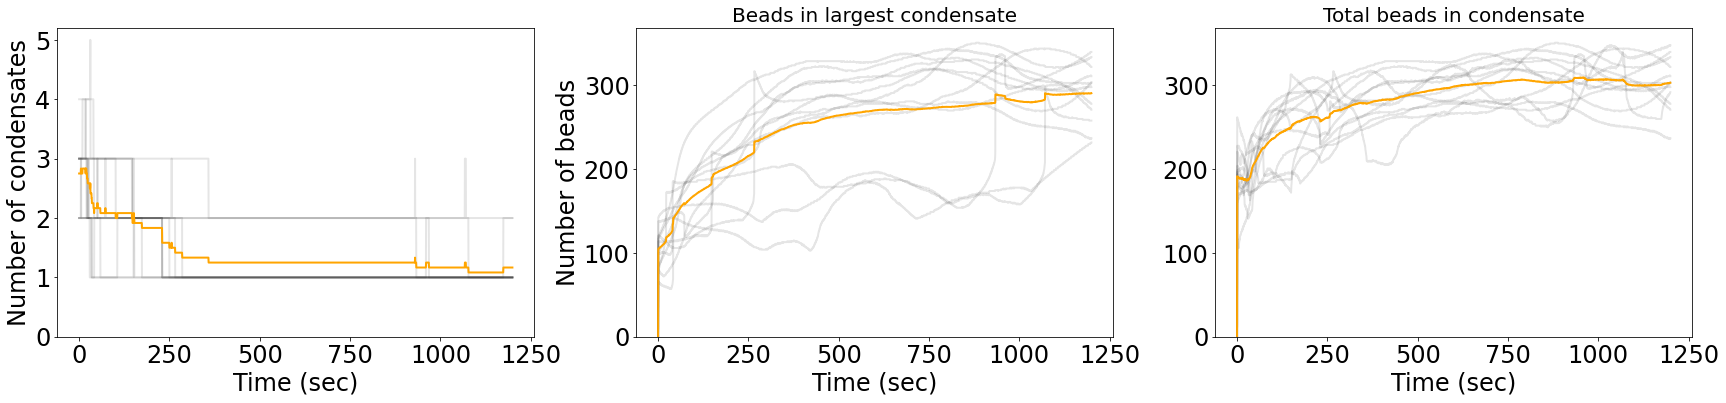

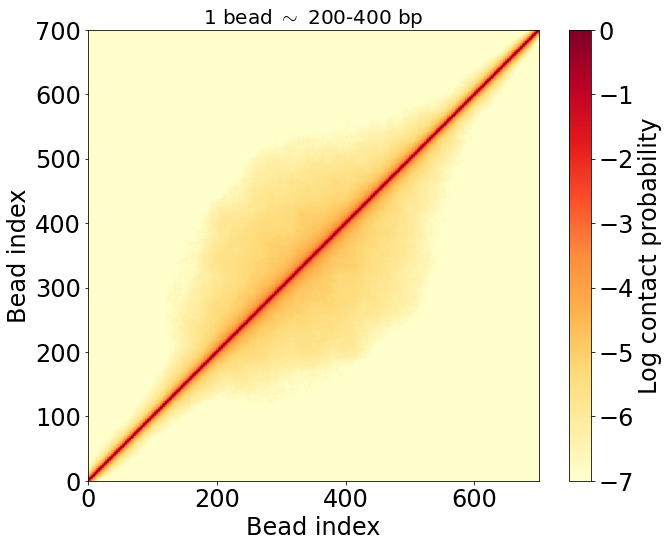

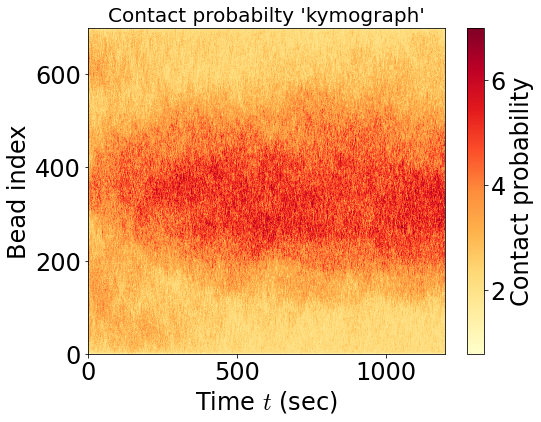

In [207]:
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/kod300"

try:
    sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('s*/analysis/*.h5')]
    ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
    end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
    time_arr = sd_h5_data_lst[0]['time'][ss_ind:end_ind]
    start_bead = 0
    end_bead = None
    nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]

    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
    
    aa.plot_condensate_num_sd_scan(axarr1[0], time_arr, cond_num_arr)
    aa.plot_condensate_size_sd_scan(axarr1[1:], time_arr, max_width_arr, total_bead_arr)
    fig1.tight_layout()
    
    log_avg_contact_mat = aa.get_scan_avg_contact_mat(sd_h5_data_lst)
    fig2, ax2 = aa.make_hic_plot(nbeads, log_avg_contact_mat, vmin=-7.)
    
    fig3, ax3 = plt.subplots(figsize=(8, 6))
    avg_contact_kymo = aa.get_scan_avg_kymo(sd_h5_data_lst)
    aa.plot_contact_kymo(fig3, ax3, time_arr, avg_contact_kymo, vmax=7.)
    #fig, ax = aa.make_hic_plot(com_arr, log_avg_contact_mat/num_seeds, vmin=-7.)
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

# Condensate growth rate comparisons

(0.0, 333.6375)

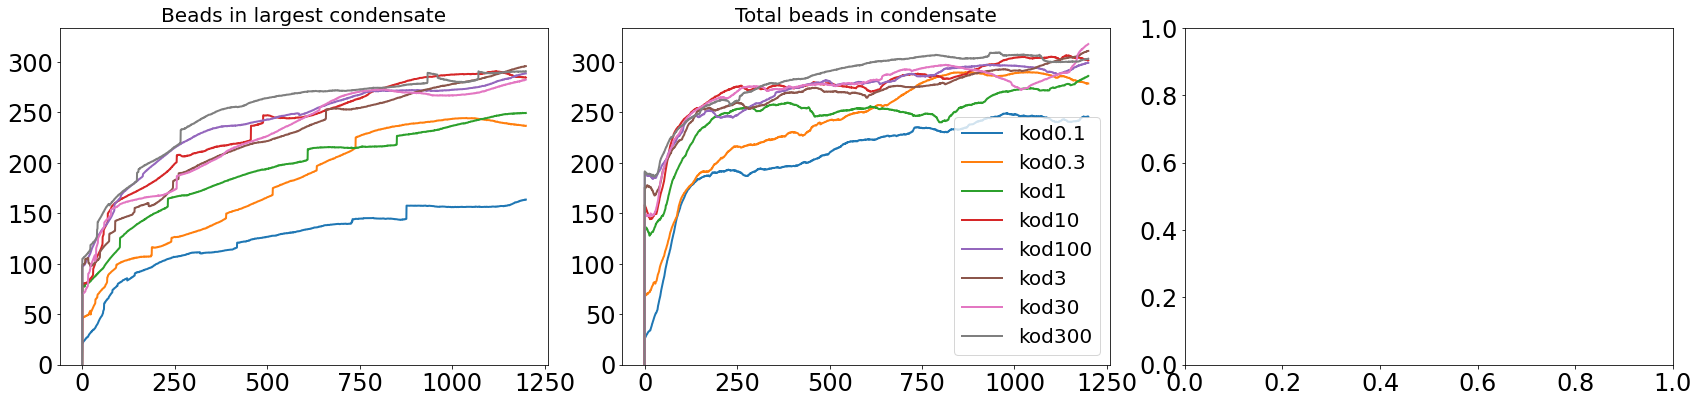

In [237]:
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/"

try:
    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    axarr1[0].sharey(axarr1[1])
    mp = re.compile('kod(\d*\.?\d+)')
    #param_dirs = [pd for pd in data_path.glob('*/')]
    param_dirs = sorted([pd for pd in data_path.glob('*/')],key=lambda x: mp.match(str(x.name))[1])
    #print(param_dirs[0].name)
    #print(mp.match(str(param_dirs[0].name))[1])
    for pd in param_dirs:
        sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in pd.glob('s*/analysis/*.h5')]
        ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
        end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
        time_arr = sd_h5_data_lst[0]['time'][ss_ind:end_ind]
        start_bead = 0
        end_bead = None
        nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]
        cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
        avg_max_width = max_width_arr.mean(axis=-1)
        avg_total_bead = total_bead_arr.mean(axis=-1)

       
        _ = axarr1[0].plot(time_arr, avg_max_width, label=str(pd.name))
        _ = axarr1[1].plot(time_arr, avg_total_bead, label=str(pd.name))
        
    _ = axarr1[0].set_title('Beads in largest condensate')
    _ = axarr1[1].set_title('Total beads in condensate')
    
    axarr1[0].set_ylim(0)

    axarr1[1].legend()
    fig1.tight_layout()

except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

(0.0, 333.6375)

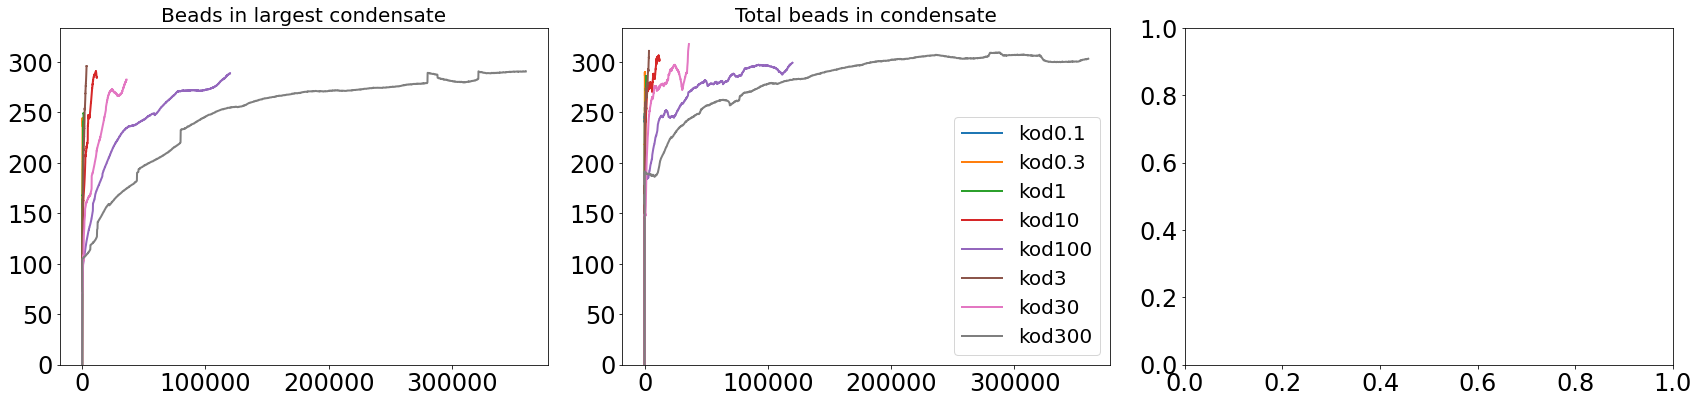

In [21]:
# Log-X rescaling
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/"

try:
    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    axarr1[0].sharey(axarr1[1])
    mp = re.compile('kod(\d*\.?\d+)')
    #param_dirs = [pd for pd in data_path.glob('*/')]
    param_dirs = sorted([pd for pd in data_path.glob('*/')],key=lambda x: mp.match(str(x.name))[1])
    for pd in param_dirs:
        freq_scale =  float(mp.match(str(pd.name))[1])
        sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in pd.glob('s*/analysis/*.h5')]
        ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
        end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
        time_arr = (sd_h5_data_lst[0]['time'][ss_ind:end_ind])*freq_scale
        start_bead = 0
        end_bead = None
        nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]
        cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
        avg_max_width = max_width_arr.mean(axis=-1)
        avg_total_bead = total_bead_arr.mean(axis=-1)

       
        _ = axarr1[0].plot(time_arr, avg_max_width, label=str(pd.name))
        _ = axarr1[1].plot(time_arr, avg_total_bead, label=str(pd.name))
        
        for h5d in sd_h5_data_lst:
            h5d.close()
        
    _ = axarr1[0].set_title('Beads in largest condensate')
    _ = axarr1[1].set_title('Total beads in condensate')
    
    #axarr1[0].set_xscale('log')
    #axarr1[1].set_xscale('log')
    axarr1[0].set_ylim(0)
    
    axarr1[1].legend()
    fig1.tight_layout()
except:
    raise
finally:
    for h5d in sd_h5_data_lst:
        h5d.close()

(0.0, 333.6375)

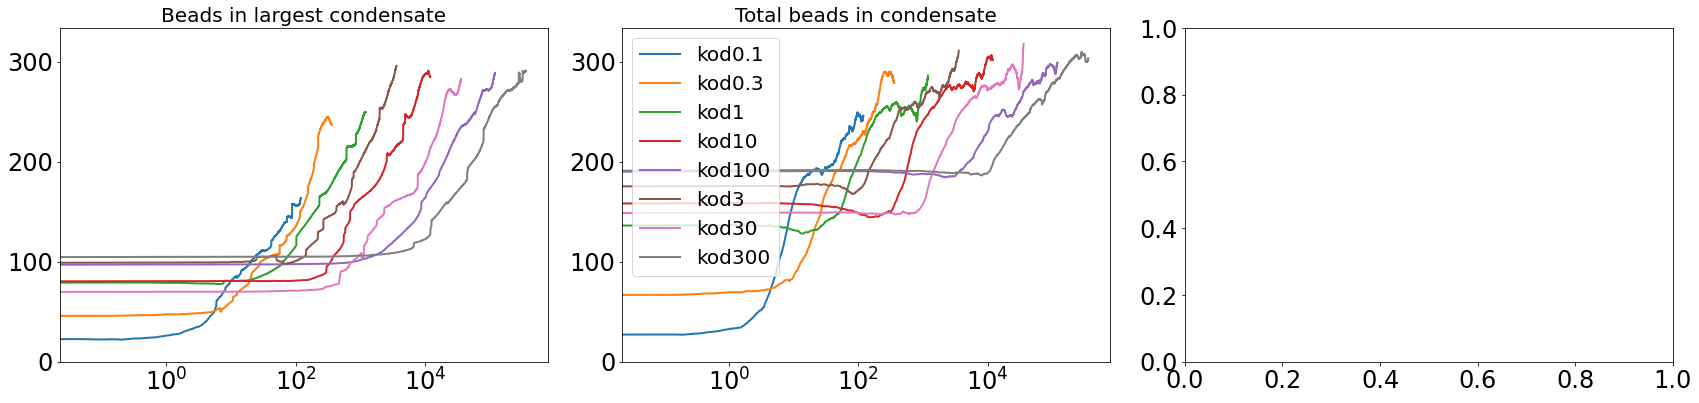

In [241]:
# Log-X rescaling
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/"

try:
    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    axarr1[0].sharey(axarr1[1])
    mp = re.compile('kod(\d*\.?\d+)')
    #param_dirs = [pd for pd in data_path.glob('*/')]
    param_dirs = sorted([pd for pd in data_path.glob('*/')],key=lambda x: mp.match(str(x.name))[1])
    #print(param_dirs[0].name)
    #print(mp.match(str(param_dirs[0].name))[1])
    for pd in param_dirs:
        freq_scale =  float(mp.match(str(pd.name))[1])
        sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in pd.glob('s*/analysis/*.h5')]
        ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
        end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
        time_arr = (sd_h5_data_lst[0]['time'][ss_ind:end_ind])*freq_scale
        start_bead = 0
        end_bead = None
        nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]
        cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
        avg_max_width = max_width_arr.mean(axis=-1)
        avg_total_bead = total_bead_arr.mean(axis=-1)

       
        _ = axarr1[0].plot(time_arr, avg_max_width, label=str(pd.name))
        _ = axarr1[1].plot(time_arr, avg_total_bead, label=str(pd.name))
        
    _ = axarr1[0].set_title('Beads in largest condensate')
    _ = axarr1[1].set_title('Total beads in condensate')
    
    axarr1[0].set_xscale('log')
    axarr1[1].set_xscale('log')
    axarr1[0].set_ylim(0)
    
    axarr1[1].legend()
    fig1.tight_layout()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

(0.0, 333.6375)

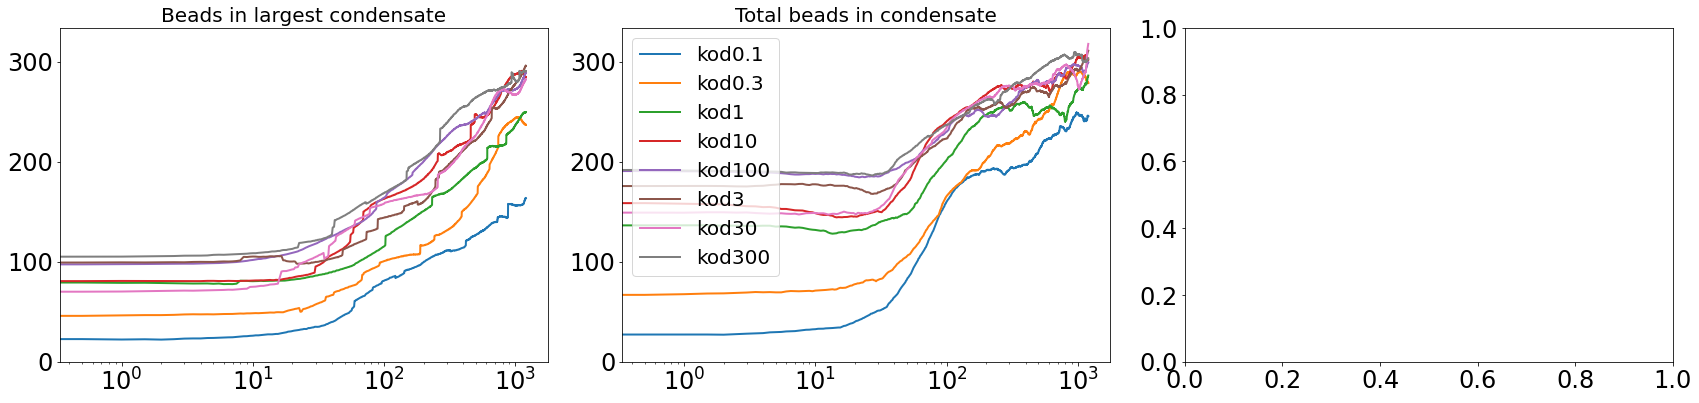

In [242]:
# Log x no scaling
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/"

try:
    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    axarr1[0].sharey(axarr1[1])
    mp = re.compile('kod(\d*\.?\d+)')

    param_dirs = sorted([pd for pd in data_path.glob('*/')],key=lambda x: mp.match(str(x.name))[1])

    for pd in param_dirs:
        freq_scale = 1. #float(mp.match(str(pd.name))[1])
        sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in pd.glob('s*/analysis/*.h5')]
        ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
        end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
        time_arr = (sd_h5_data_lst[0]['time'][ss_ind:end_ind])*freq_scale
        start_bead = 0
        end_bead = None
        nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]
        cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
        avg_max_width = max_width_arr.mean(axis=-1)
        avg_total_bead = total_bead_arr.mean(axis=-1)

       
        _ = axarr1[0].plot(time_arr, avg_max_width, label=str(pd.name))
        _ = axarr1[1].plot(time_arr, avg_total_bead, label=str(pd.name))
        
    _ = axarr1[0].set_title('Beads in largest condensate')
    _ = axarr1[1].set_title('Total beads in condensate')
    
    axarr1[0].set_xscale('log')
    axarr1[1].set_xscale('log')
    axarr1[0].set_ylim(0)

    axarr1[1].legend()
    fig1.tight_layout()

except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/tmp/ipykernel_344328/2840349229.py:35: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axarr1[0].set_ylim(0)


(23.79129390876836, 359.49162185673214)

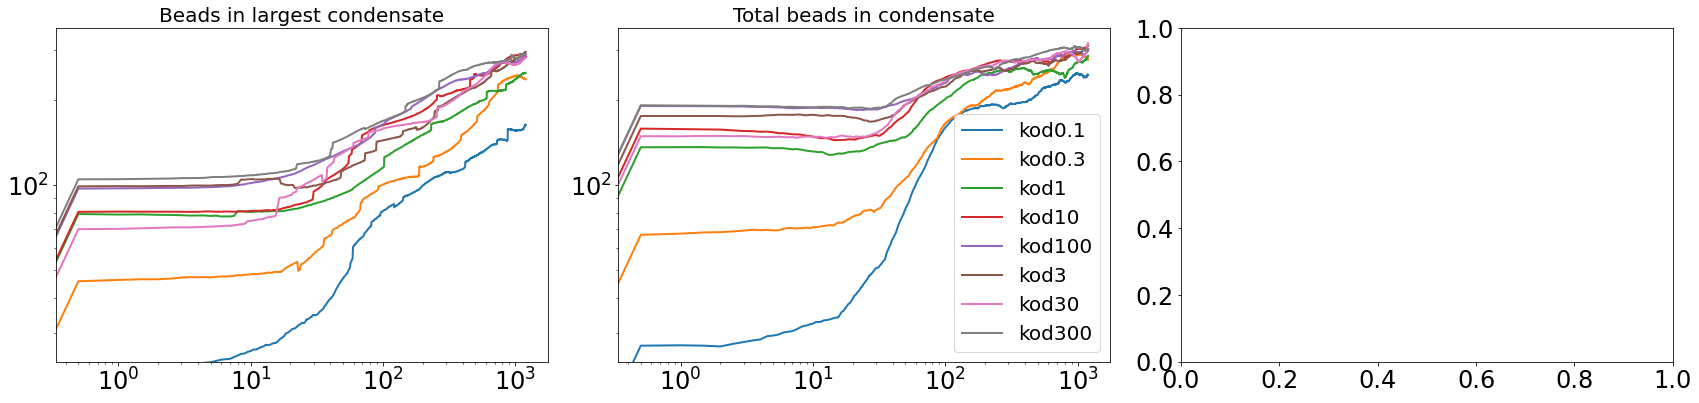

In [243]:
# Log-log no scaling
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/"

try:
    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    axarr1[0].sharey(axarr1[1])
    mp = re.compile('kod(\d*\.?\d+)')
    #param_dirs = [pd for pd in data_path.glob('*/')]
    param_dirs = sorted([pd for pd in data_path.glob('*/')],key=lambda x: mp.match(str(x.name))[1])
    #print(param_dirs[0].name)
    #print(mp.match(str(param_dirs[0].name))[1])
    for pd in param_dirs:
        freq_scale = 1. #float(mp.match(str(pd.name))[1])
        sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in pd.glob('s*/analysis/*.h5')]
        ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
        end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
        time_arr = (sd_h5_data_lst[0]['time'][ss_ind:end_ind])*freq_scale
        start_bead = 0
        end_bead = None
        nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]
        cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
        avg_max_width = max_width_arr.mean(axis=-1)
        avg_total_bead = total_bead_arr.mean(axis=-1)

       
        _ = axarr1[0].plot(time_arr, avg_max_width, label=str(pd.name))
        _ = axarr1[1].plot(time_arr, avg_total_bead, label=str(pd.name))
        
    _ = axarr1[0].set_title('Beads in largest condensate')
    _ = axarr1[1].set_title('Total beads in condensate')
    
    axarr1[0].set_xscale('log')
    axarr1[1].set_xscale('log')
    axarr1[0].set_yscale('log')
    axarr1[1].set_yscale('log')
    axarr1[0].set_ylim(0)
    
#     aa.plot_condensate_num_sd_scan(axarr1[0], time_arr, cond_num_arr)
#     aa.plot_condensate_size_sd_scan(axarr1[1:], time_arr, max_width_arr, total_bead_arr)
    axarr1[1].legend()
    fig1.tight_layout()
    
#     log_avg_contact_mat = aa.get_scan_avg_contact_mat(sd_h5_data_lst)
#     fig2, ax2 = aa.make_hic_plot(nbeads, log_avg_contact_mat, vmin=-7.)
    
#     fig3, ax3 = plt.subplots(figsize=(8, 6))
#     avg_contact_kymo = aa.get_scan_avg_kymo(sd_h5_data_lst)
#     aa.plot_contact_kymo(fig3, ax3, time_arr, avg_contact_kymo, vmax=7.)
    #fig, ax = aa.make_hic_plot(com_arr, log_avg_contact_mat/num_seeds, vmin=-7.)
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

/tmp/ipykernel_344328/4207073320.py:35: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axarr1[0].set_ylim(0)


(23.79129390876836, 359.49162185673214)

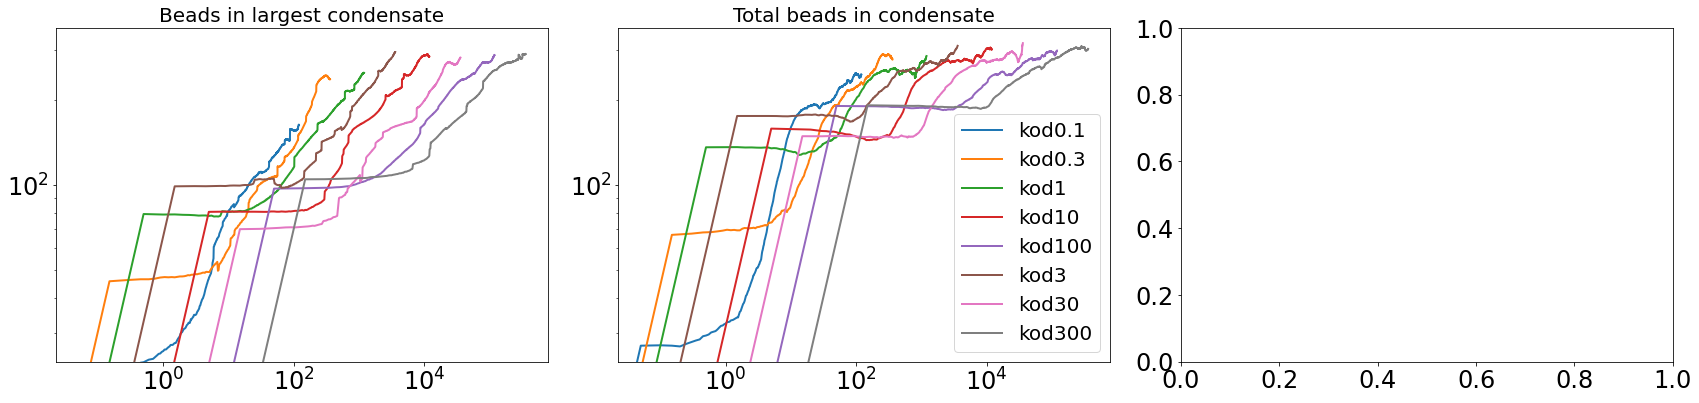

In [244]:
# Log-Log rescale
data_path = ceph_path / "22-01-06_aLchr1_scan8.12_line700_2xsticky_4umconf_ko.1-300/simulations/"

try:
    fig1, axarr1 = plt.subplots(1, 3, figsize=(24, 6))
    axarr1[0].sharey(axarr1[1])
    mp = re.compile('kod(\d*\.?\d+)')
    param_dirs = sorted([pd for pd in data_path.glob('*/')],key=lambda x: mp.match(str(x.name))[1])
    for pd in param_dirs:
        freq_scale = float(mp.match(str(pd.name))[1])
        sd_h5_data_lst = [h5py.File(h5p, 'r+') for h5p in pd.glob('s*/analysis/*.h5')]
        ss_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][0]
        end_ind = sd_h5_data_lst[0]['analysis/pos_kymo'].attrs['timestep_range'][1]
        time_arr = (sd_h5_data_lst[0]['time'][ss_ind:end_ind])*freq_scale
        start_bead = 0
        end_bead = None
        nbeads = sd_h5_data_lst[0]['raw_data']['sylinders'][start_bead:end_bead, 0, 0].shape[0]
        cond_num_arr, max_width_arr, total_bead_arr = aa.get_scan_cond_data(sd_h5_data_lst)
        avg_max_width = max_width_arr.mean(axis=-1)
        avg_total_bead = total_bead_arr.mean(axis=-1)

       
        _ = axarr1[0].plot(time_arr, avg_max_width, label=str(pd.name))
        _ = axarr1[1].plot(time_arr, avg_total_bead, label=str(pd.name))
        
    _ = axarr1[0].set_title('Beads in largest condensate')
    _ = axarr1[1].set_title('Total beads in condensate')
    
    axarr1[0].set_xscale('log')
    axarr1[1].set_xscale('log')
    axarr1[0].set_yscale('log')
    axarr1[1].set_yscale('log')
    axarr1[0].set_ylim(0)
    
    axarr1[1].legend()
    fig1.tight_layout()

except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

# Conclusions and Next Steps